### Problem Set 3 - Extend What You Have Learned

Now that you know how to scrape data from Twitter, let's extend the exercise a little so you can show us what you know. This time you will set up the scraper to get data around MIT and scrape data for 20 minutes. Then you will visualize it with  and visualize. Think about what you would need to change to do that. 

Once you have the new JSON file of Boston tweets you should a pie chart and scatterplot of your collected tweets. When you are creating your dataset, you should get at least two different attributes returned by the Twitter API (we got many of them above, so base it off of that example). Atleast one of them should be the tweet id. Make sure you remove and duplicate tweets (if any). Expanding on the above, then save the data to a CSV.

Make sure you get your own Twitter Key.

#### Deliverables

**1** - Using the Twitter REST API, collect Tweets from Boston for 30 min. Note how you set the time in the above example (in the **run_all()** function), it was in seconds. How would you do that here? 

**2** - Create a Pie Chart showing a summary of tweets by user location. Please clean up the data so that multiple variations of the same location name are replaced with one variation.

**3** - Create a Scatterplot showing all of the tweets that had a latitude and longitude.

**4** - Pick a search term, such as *Trump* or *#Trump* and collect 15 minutes of tweets on it. Use the same lat/lon for Boston as you used above.

**5** - Export the entirety of your scraped Twitter datasets (one with a search term, one without) to two CSV files. We will be checking this CSV file for duplicates. So clean your file.  

### What to Give Us on Stellar 

1 - Create a new Jupyter notebook that contains your scraper code. You can copy much of this one, but customize it. Submit the new Jupyter notebook, which includes your pie chart and scatterplot.

2 - Your final CSV files. 


In [3]:
# Import libraries
import json
import time
import threading
from datetime import datetime
from twython import Twython

# Imports the keys from the python file
from twitter_key import api_key, api_secret

In [2]:
# Assigns the keys to the variables
APP_KEY = api_key
APP_SECRET = api_secret

# Create a Twython object called Twitter
twython_setup = Twython(APP_KEY, APP_SECRET, oauth_version=2)
OAUTH2_ACCESS_TOKEN = twython_setup.obtain_access_token()
my_twython = Twython(APP_KEY, access_token=OAUTH2_ACCESS_TOKEN)

In [3]:
# Setup Search Parameters
search_term=''
latlong=[42.3133521,-71.1271969] #downtown boston
distance='25mi'
type_of_result='recent'
number_of_tweets=50 #450 in 15 mins

# Fetches tweets with a given query at a given lat-long.
def get_tweets_by_location( latlong=None ):
    # Uses the search function to hit the APIs endpoints and look for recent tweets within the area
    results = my_twython.search(q=search_term, geocode=str(latlong[0])+','+str(latlong[1])+','+ distance, result_type=type_of_result, count=number_of_tweets)
    # Returns the only the statuses from the resulting JSON
    return results['statuses']

# test run our function
get_tweets_by_location(latlong)

[{'contributors': None,
  'coordinates': None,
  'created_at': 'Mon Mar 06 15:28:13 +0000 2017',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'bit.ly/2mtilZo',
     'expanded_url': 'http://bit.ly/2mtilZo',
     'indices': [13, 36],
     'url': 'https://t.co/niiqNW5Wqc'}],
   'user_mentions': [{'id': 63126241,
     'id_str': '63126241',
     'indices': [0, 12],
     'name': 'Kevin Cullen',
     'screen_name': 'GlobeCullen'}]},
  'favorite_count': 0,
  'favorited': False,
  'geo': None,
  'id': 838773216655126528,
  'id_str': '838773216655126528',
  'in_reply_to_screen_name': 'GlobeCullen',
  'in_reply_to_status_id': None,
  'in_reply_to_status_id_str': None,
  'in_reply_to_user_id': 63126241,
  'in_reply_to_user_id_str': '63126241',
  'is_quote_status': False,
  'lang': 'en',
  'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
  'place': None,
  'possibly_sensitive': False,
  'retweet_count': 0,
  'retweeted': False,
  'source': '<a href="

In [4]:
def get_lots_of_tweets( latlong ):
    all_tweets = {}
    total_time = 600
    remaining_seconds = total_time
    interval = 10
    while remaining_seconds > 0: # loop and run the function while remaining seconds is greater than zero
        added = 0
        # Hit the Twitter API using our function
        new_tweets = get_tweets_by_location(latlong) # we set latlong above!
        # Parse the resulting JSON, and save the rest of the raw content
        for tweet in new_tweets:
            tid = tweet['id']
            if tid not in all_tweets:
                properties = {}
                if tweet['coordinates'] != None:
                    properties['lat'] = tweet['coordinates']['coordinates'][0]
                    properties['lon'] = tweet['coordinates']['coordinates'][1]
                else:
                    properties['lat'] = None
                    properties['lon'] = None
                properties['location'] = tweet['user']['location'] #This will get us the location associated with the profile
                properties['tweet_id'] = tid
                properties['content'] = tweet['text']
                properties['user'] = tweet['user']['id']
                properties['raw_source'] = tweet
                properties['data_point'] = 'none'
                properties['time'] = tweet['created_at']
                all_tweets[ tid ] = properties
                added += 1
        print("At %d seconds, added %d new tweets, for a total of %d" % ( total_time - remaining_seconds, added, len( all_tweets )))
        # We wait a few seconds and hit the API again
        time.sleep(interval)
        remaining_seconds -= interval
    print(str(len(all_tweets)) + ' Tweets retrieved.')
    # We return the final dictionary to work with in Python
    return all_tweets

In [5]:
# This function executes the the functions over a given period of time
def run_all():
    # This is the number of times the code will be executed. In this case, just once. 
    starting = 3
    while starting > 0:
        # Sometimes the API returns some errors, killing the whole script, so we setup try/except to make sure it keeps running
        try:
            t = get_lots_of_tweets( latlong )
            # We name every file with the current time
            timestr = time.strftime("%Y%m%d-%H%M%S")
            # We write a new JSON into the target path
            with open( 'data/' + '%stweets.json' %(timestr), 'w' ) as f:
                f.write(json.dumps(t))
            # we can use a library like threading to execute the run function continuously.
            #threading.Timer(10, run).start()
            starting -= 1
        except:
            pass
    
run_all()

At 0 seconds, added 50 new tweets, for a total of 50
At 10 seconds, added 0 new tweets, for a total of 50
At 20 seconds, added 50 new tweets, for a total of 100
At 30 seconds, added 0 new tweets, for a total of 100
At 40 seconds, added 50 new tweets, for a total of 150
At 50 seconds, added 50 new tweets, for a total of 200
At 60 seconds, added 0 new tweets, for a total of 200
At 70 seconds, added 50 new tweets, for a total of 250
At 80 seconds, added 0 new tweets, for a total of 250
At 90 seconds, added 50 new tweets, for a total of 300
At 100 seconds, added 0 new tweets, for a total of 300
At 110 seconds, added 48 new tweets, for a total of 348
At 120 seconds, added 0 new tweets, for a total of 348
At 130 seconds, added 50 new tweets, for a total of 398
At 140 seconds, added 0 new tweets, for a total of 398
At 150 seconds, added 50 new tweets, for a total of 448
At 160 seconds, added 0 new tweets, for a total of 448
At 170 seconds, added 50 new tweets, for a total of 498
At 180 second

In [1]:
# Import some additional libraries that will allow us to plot and interact with the operating system
from os import listdir
from os.path import isfile, join
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Get the file names from a given directory
file_dir = "data" # Set this to where your JSON saved
# Get only the JSONs we have saved
onlyfiles = [ f for f in listdir(file_dir) if isfile(join(file_dir,f)) and not f.startswith('.')]

# create an empty dataframe with columns for each property
df_tweets = pd.DataFrame(columns = ['tweet_id', 'lat', 'lon', 'content','location','user','raw_source','data_point','time'])

# Loop through all the files
for file in onlyfiles:
    full_dir = join(file_dir,file) 
    with open(full_dir) as json_data:
        dict = json.load(json_data) # creates a Python dictionary of our json
        if not isinstance(dict, list):
            for key, val in dict.items():
                df_tweets.loc[key,val] = val
                
df_tweets

tweet_id      lat      lon  \
838773322309578761  838773322309578761     None     None   
838773322078957568  838773322078957568     None     None   
838773320145227776  838773320145227776     None     None   
838773319600046080  838773319600046080     None     None   
838773319210057729  838773319210057729     None     None   
838773318815780864  838773318815780864     None     None   
838773318090174464  838773318090174464     None     None   
838773317544861698  838773317544861698     None     None   
838773316198498305  838773316198498305     None     None   
838773315930050560  838773315930050560     None     None   
838773315527401472  838773315527401472     None     None   
838773314189414400  838773314189414400     None     None   
838773312742375424  838773312742375424     None     None   
838773311979065344  838773311979065344     None     None   
838773311534432258  838773311534432258     None     None   
838773309617614850  838773309617614850     None     None   
838773309491806208  838773309491806208     None     None   
838773308753592322  838773308753592322     None     None   
838773307465871361  838773307465871361     None     None   
838773307243708416  838773307243708416     None     None   
838773307017162752  838773307017162752     None     None   
838773304894898178  838773304894898178     None     None   
838773303821156352  838773303821156352     None     None   
838773301371535361  838773301371535361 -71.4162  42.2793   
838773300893462528  838773300893462528     None     None   
838773298490183681  838773298490183681     None     None   
838773298179661824  838773298179661824     None     None   
838773297865183232  838773297865183232     None     None   
838773297353371648  838773297353371648     None     None   
838773295734480897  838773295734480897     None     None   
...                                ...      ...      ...   
838781000033325060  838781000033325060 -71.2378  42.2809   
838780999651770368  838780999651770368     None     None   
838780999622406146  838780999622406146     None     None   
838780999291047936  838780999291047936     None     None   
838780998963855361  838780998963855361     None     None   
838780998687010822  838780998687010822     None     None   
838780998108205056  838780998108205056     None     None   
838780997890158597  838780997890158597     None     None   
838780997038637060  838780997038637060     None     None   
838780996136894469  838780996136894469     None     None   
838780995629363200  838780995629363200     None     None   
838780994056511489  838780994056511489     None     None   
838780993511251969  838780993511251969     None     None   
838780992966037504  838780992966037504     None     None   
838780992089370625  838780992089370625     None     None   
838780991309299714  838780991309299714     None     None   
838780991162494978  838780991162494978     None     None   
838780988847173633  838780988847173633     None     None   
838780988599767044  838780988599767044     None     None   
838780988339683329  838780988339683329     None     None   
838780988188672000  838780988188672000     None     None   
838780987056193539  838780987056193539     None     None   
838780986179604480  838780986179604480     None     None   
838780985491787777  838780985491787777     None     None   
838780984879366144  838780984879366144     None     None   
838780983780356096  838780983780356096     None     None   
838780983591780352  838780983591780352     None     None   
838780982996062208  838780982996062208     None     None   
838780982975156224  838780982975156224     None     None   
838780982949986305  838780982949986305     None     None   

                                                              content  \
838773322309578761  "fish are friends not food" - Bruce the Shark ...   
838773322078957568  Zelda: Breath of the Wild, so far, is possibly...   
838773320145227776                                                 ＾＾   
83877331960004608

In [7]:
# Group by location
grouped_tweets = df_tweets.groupby('location')
count_tweets = grouped_tweets['location'].count()
df_count_tweets = count_tweets.to_frame()
df_count_tweets.columns = ['Count']
df_count_tweets.index.names = ['Location']
df_count_tweets.sort_index()

Count
Location                             
                                  600
\n                                  1
  401 ⚓️                            1
 98 Rice St Boston, MA 02128        1
 Boston                             1
 Boston MA                          1
 Boston, MA                         1
 Chatham, MA                        1
 Marblehead, Massachusetts          1
 Ohio                               1
 htx                                1
 | Dans Le Futur |                  1
 日本                                 1
#Blacklivesmatter                   1
#MountainView #SiliconValley        1
$an Diego                           1
(RT are not endorsements)           1
+65                                 1
..in a New York state of mind       1
01902                               1
02043 || 02139                      1
02119                               1
02131                               1
02368                               3
1.18.83                             1
1K                                  1
21A                                 1
26 Oxford St. Cambridge, MA         1
36.6987493 -78.901398               1
413                                 1
...                               ...
wilmington                          1
worldwide                           1
ÜT: 41.78766,-72.716296             1
ÜT: 41.848955,-87.684423            1
Санкт-Петербург, Россия             1
दुआ में याद रखना (कोटा , भारत)      1
กรุงเทพมหานคร                       1
นอกโลก                              1
ประเทศหาดใหญ่วิทยาลัย               1
ประเทศไทย                           2
อ.ห้างฉัตร, จ.ลำปาง                 1
▲ Victory Road                      1
♕Originated in Queens, NY♕          1
❦                                   1
⠀⠀⠀⠀⠀⠀⠀⠀H4RMONY 3/4                 1
でーぶ                                 1
ふたなり島                               1
ハーバード大学                             7
フォレスターの中                            1
ボストン                                1
マサチューセッツ工科大学                        3
屋久島➱鹿児島                             1
愛知                                  1
東京ディズニーシー                           1
浜松市                                 1
神奈川県横浜市                             1
福岡市と近郊                              1
関西のどこか                              1
모니터 앞                               1
인천                                  1

[1211 rows x 1 columns]

In [11]:
# Clean data
#variations_of_boston = ['Boston', 'boston', 'Boston MA']
#df_tweets['location'].replace(variations_of_boston, 'Boston, MA')
df_tweets['location'].replace('^.*[Bb]oston.*$', 'Boston, MA', regex=True)

838773322309578761                   Norwood, MA
838773322078957568                  Randolph, MA
838773320145227776                       Chelsea
838773319600046080                Somerville, MA
838773319210057729                              
838773318815780864                    Boston, MA
838773318090174464                              
838773317544861698                Sunshine State
838773316198498305                    Boston, MA
838773315930050560                    Boston, MA
838773315527401472                  Hathorne, MA
838773314189414400                              
838773312742375424      Vergraben unter Büchern.
838773311979065344                    Boston, MA
838773311534432258                    Boston, MA
838773309617614850                 United States
838773309491806208                  Buenos Aires
838773308753592322                    Boston, MA
838773307465871361                              
838773307243708416                    Boston, MA
838773307017162752  

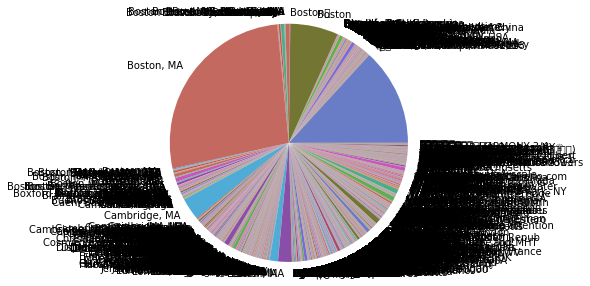

In [10]:
# Pie Chart
colors = ["#697dc6","#5faf4c","#7969de","#b5b246",
          "#cc54bc","#4bad89","#d84577","#4eacd7",
          "#cf4e33","#894ea8","#cf8c42","#d58cc9",
          "#737632","#9f4b75","#c36960"]

plt.pie( df_count_tweets['Count'], labels=df_count_tweets.index.get_values(), shadow=False, colors=colors)
plt.axis('equal')
plt.tight_layout()
plt.show()

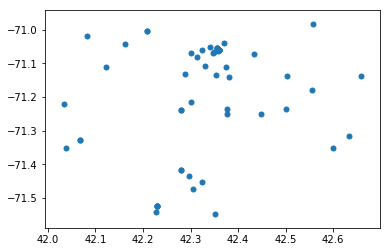

In [13]:
#Scatter plot
df_tweets_with_location = df_tweets[df_tweets.lon.notnull() & df_tweets.lat.notnull()]
plt.scatter(df_tweets_with_location['lon'],df_tweets_with_location['lat'], s=25)
plt.show()